Source: https://ocw.mit.edu/courses/8-321-quantum-theory-i-fall-2017/pages/syllabus/

#Fundamental concepts

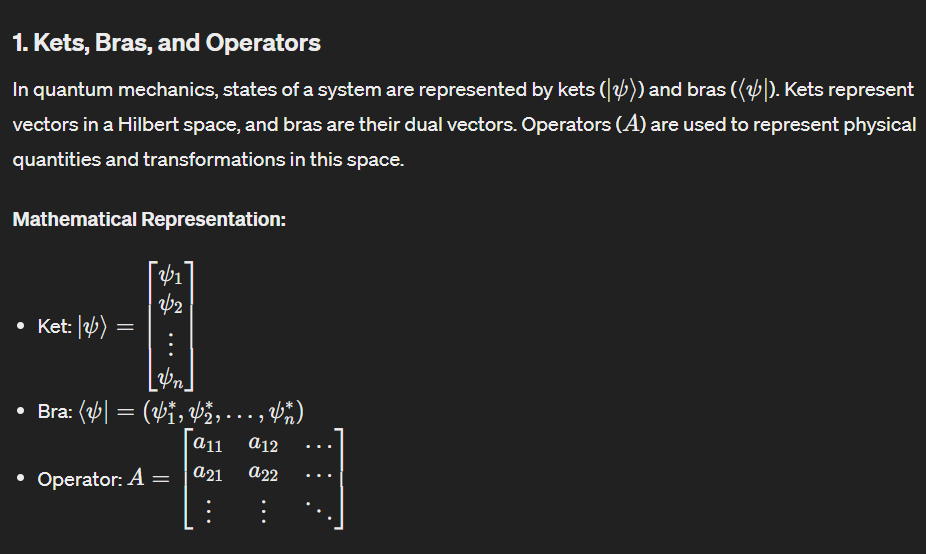

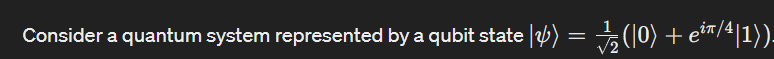

In [1]:
import numpy as np

# Define a ket vector
ket_psi = np.array([1, 0])

# Define a bra vector (conjugate transpose of ket_psi)
bra_psi = np.conjugate(ket_psi).T

# Define an operator (matrix)
A = np.array([[3, 1],
              [1, 2]])

# Applying an operator to a ket
result = np.dot(A, ket_psi)
print(result)

[3 1]


In [5]:
import numpy as np

# Define the quantum state |psi>
psi = np.array([1/np.sqrt(2), np.exp(1j*np.pi/4)/np.sqrt(2)])  # |psi> = (|0> + e^(i*pi/4)|1>)/sqrt(2)

# Define Pauli matrices
sigma_x = np.array([[0, 1],
                     [1, 0]])
sigma_y = np.array([[0, -1j],
                     [1j, 0]])
sigma_z = np.array([[1, 0],
                     [0, -1]])

# Apply a sequence of quantum gates (e.g., X, Y, Z gates)
# For example, let's apply Y gate followed by X gate
gate_sequence = np.dot(sigma_y, sigma_x)

# Evolve the state |psi> using the gate sequence
psi_evolved = np.dot(gate_sequence, psi)

print("Evolved state after applying YX gates:")
print(psi_evolved)


Evolved state after applying YX gates:
[ 0. -0.70710678j -0.5+0.5j       ]


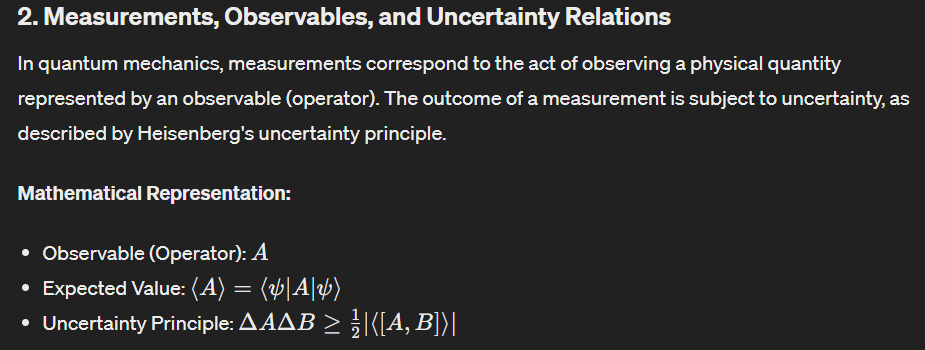

In [2]:
# Define another observable B
B = np.array([[1, 2],
              [2, 3]])

# Compute the commutator [A, B]
commutator_AB = np.dot(A, B) - np.dot(B, A)

# Calculate uncertainty using eigenvalues
eigenvalues_AB = np.linalg.eigvalsh(commutator_AB)
uncertainty = 0.5 * np.abs(eigenvalues_AB.min())
print("Uncertainty:", uncertainty)

Uncertainty: 2.0


Quantum Uncertainty in a Harmonic Oscillator

In [7]:
import numpy as np

# Define ladder operators for the quantum harmonic oscillator
N = 5  # Number of energy levels (for truncation)
a = np.diag(np.sqrt(np.arange(1, N)), 1)  # Lowering operator
a_dagger = a.T  # Raising operator

# Define position and momentum operators in terms of ladder operators
x = np.sqrt(1/(2*np.pi)) * (a + a_dagger)
p = 3j * np.sqrt(1/(2*np.pi)) * (a - a_dagger)

# Compute the commutator [x, p]
commutator_xp = np.dot(x, p) - np.dot(p, x)

# Calculate eigenvalues of the commutator
eigenvalues_xp = np.linalg.eigvalsh(commutator_xp)

# Determine uncertainty (smallest eigenvalue magnitude / 2)
uncertainty_xp = 0.5 * np.abs(eigenvalues_xp.min())

print("Uncertainty (position-momentum) for a quantum harmonic oscillator:", uncertainty_xp)

Uncertainty (position-momentum) for a quantum harmonic oscillator: 1.2412670766236368e-16


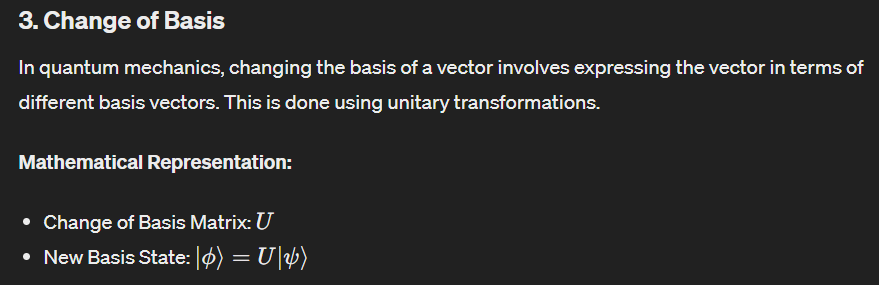

In [3]:
# Define a unitary transformation matrix U
U = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
              [-1/np.sqrt(2), 1/np.sqrt(2)]])

# Change the basis of ket_psi
ket_phi = np.dot(U, ket_psi)
print("New basis ket_phi:", ket_phi)

New basis ket_phi: [ 0.70710678 -0.70710678]


Unitary Transformation of a Quantum State

In [8]:
import numpy as np

# Define the quantum state |psi> in the computational basis
psi_computational = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # |psi> = (|0> + |1>)/sqrt(2)

# Define a unitary transformation matrix U (Hadamard gate)
U = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
              [1/np.sqrt(2), -1/np.sqrt(2)]])

# Transform the state |psi> to the Hadamard basis
psi_hadamard_basis = np.dot(U, psi_computational)

print("State |psi> in the Hadamard basis:")
print(psi_hadamard_basis)

State |psi> in the Hadamard basis:
[1.00000000e+00 2.23711432e-17]


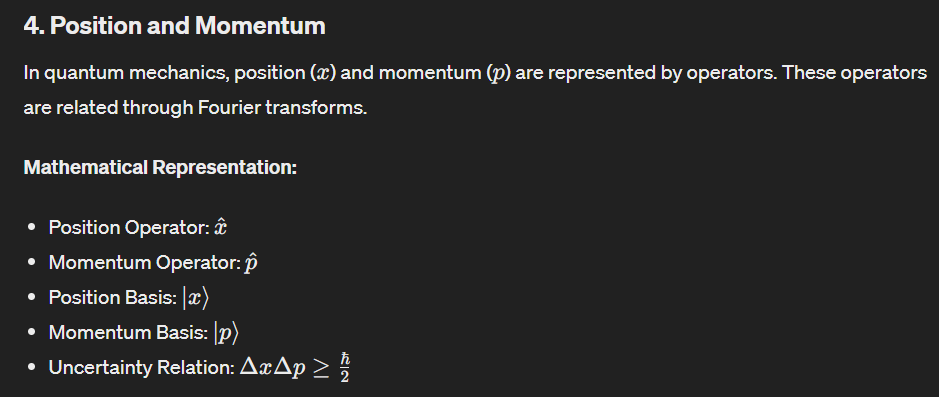

In [4]:
# Define position and momentum operators
x = np.array([[0, 1],
              [1, 0]])

p = np.array([[0, -1j],
              [1j, 0]])

# Compute the uncertainty relation
commutator_xp = np.dot(x, p) - np.dot(p, x)
eigenvalues_xp = np.linalg.eigvalsh(commutator_xp)
uncertainty_xp = 0.5 * np.abs(eigenvalues_xp.min())
print("Uncertainty (position-momentum):", uncertainty_xp)

Uncertainty (position-momentum): 0.0


 Quantum Harmonic Oscillator Wavefunctions

<ipython-input-9-4e7f5842283b>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  prefactor = 1/np.sqrt(2**n * np.math.factorial(n)) * (1/np.pi)**0.25


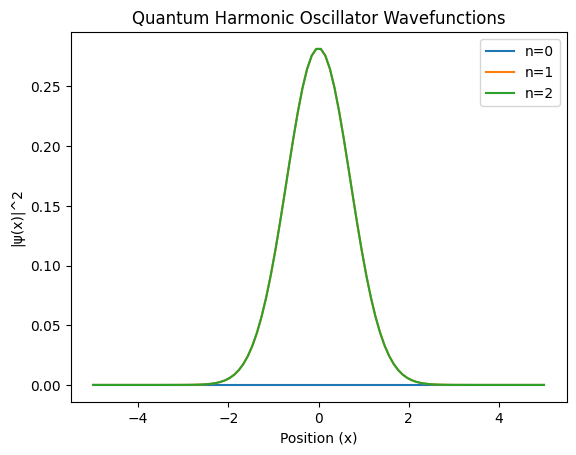

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
x_min, x_max = -5, 5
num_points = 100
x_values = np.linspace(x_min, x_max, num_points)

# Define quantum harmonic oscillator potential
def harmonic_oscillator_potential(x):
    return 0.5 * x**2

# Solve the Schrödinger equation numerically to obtain wavefunctions
def quantum_harmonic_oscillator_wavefunction(x, n):
    prefactor = 1/np.sqrt(2**n * np.math.factorial(n)) * (1/np.pi)**0.25
    hermite = np.polynomial.hermite.Hermite(n)(x * np.sqrt(1))  # Hermite polynomial
    exponential = np.exp(-x**2 / 2)  # Gaussian term
    return prefactor * hermite * exponential

# Plot wavefunctions for the first few energy levels (n=0, 1, 2)
energy_levels = [0, 1, 2]
for n in energy_levels:
    psi_n = quantum_harmonic_oscillator_wavefunction(x_values, n)
    plt.plot(x_values, np.abs(psi_n)**2, label=f'n={n}')

plt.title('Quantum Harmonic Oscillator Wavefunctions')
plt.xlabel('Position (x)')
plt.ylabel('|ψ(x)|^2')
plt.legend()
plt.show()